<a href="https://colab.research.google.com/github/nastya-andreeva/IntroductionToAI/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЛАБОРАТОРНАЯ РАБОТА 3**

Андреева Анастасия

Группа: БИВТ-22-СП-3

Датасет: Application_Data

# Импорт данных

*1) Загрузить необходимые данные к себе и считать (read) их в переменную.*

In [267]:
import pandas as pd

data = pd.read_csv('Application_Data.csv', sep=',')
data.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


# Задача

*2) Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (если у вас многоклассовая классификация, прочтите P.S.S. внизу).*

Целевая переменная - Status. Она может принимать только значения 0 или 1. Следовательно, это задача бинарной классификации.

# Предобработка данных

*А. Разделить выборку на тренировочную (train) и тестовую (test). Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test.*

In [268]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Status', 'Applicant_ID'])  # признаки, за исключением Status и Applicant_ID
y = data['Status'] # целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # само разделение

print(f"Размер train выборки: {X_train.shape}") # строки столбцы
print(f"Размер test выборки: {X_test.shape}")

Размер train выборки: (20102, 19)
Размер test выборки: (5026, 19)


Для разделения данных на тренировочные и тестовые используется метод train_test_split из sklearn. Обычно данные делятся пропорционально 80:20 или 70:30.

---


test_size=0.2 - 20% в тестовую выборку

random_state=42 - случайное разбиение для воспроизводимости (свойство давать один и тот же результат при повторных данных)

stratify=y - одинаковое соотношение классов 0 и 1 в train и test (стратифицированное разбиение)

*B. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.*

In [269]:
missing_values_train = X_train.isnull().sum()
missing_values_test = X_test.isnull().sum()
print("Пропуски в train:\n", missing_values_train)
print()
print("Пропуски в test:\n", missing_values_test)

Пропуски в train:
 Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
dtype: int64

Пропуски в test:
 Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Deb

Пропусков нет, значит использование стратегий не требуется.

*C. Отнормировать численные переменные (StandardScaler, MinMaxScaler).*

In [270]:
from sklearn.preprocessing import StandardScaler

num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns # выбираем численные переменные
scaler = StandardScaler() # нормализация
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])


StandardScaler - масштабирует данные так, чтобы среднее значение было равно 0, а стандартное отклонение было равно 1.

fit_transform - вычисляет параметры (среднее и стандратное отклонение) на тренировочных данных.

transform - преобразует тестовые данные, используя параметры, вычисленные на тренировочной выборке.


---

StandardScaler - масштабирует данные, преобразуя их в стандартное нормальное распределение с средним значением 0 и стандартным отклонением 1 (предпочтителен - если признаки близки к нормальному распределению, модель чувствительна к распределению данных, необходимо сохранить данные в изначальном масштабе).
MinMaxScaler - масштабирует данные в диапазон от 0 до 1 (или любой другой заданный диапазон) (предпочтителен - данные имеют четко определенный диапазон, все признаки нужно свести к одному масштабу, меньше выбросов или они не имеют влияния).



---

В датасете есть переменные с большим разбросом (например, Total_Income - диапазон от нескольких тысяч до миллионов), поэтому важно привести данные к стандартному нормальному распределению. MinMaxScaler был бы менее эффективен из-за экстремальных значений, так как он нормализует данные в диапазоне от 0 до 1, исходя из минимальных и максимальных значений.

*D. Закодировать категориальные признаки по одной из стратегий.*

In [271]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = X_train.select_dtypes(include=['object', 'category']).columns # находим категориальные столбцы
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# sparse_output - результат в виде плотной матрицы (без разреженной), облегчает конкатенацию дальше
# handle_unknown - игнорировать ошибку неизвестных категорий (не было в тренировочных данных)

X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[cat_columns]),
                           columns=encoder.get_feature_names_out(cat_columns)) # преобразование признаков в train

X_test_cat = pd.DataFrame(encoder.transform(X_test[cat_columns]),
                          columns=encoder.get_feature_names_out(cat_columns)) # преобразование признаков в test

# объединение закодированных данных с числовыми признаками
X_train = pd.concat([X_train.drop(columns=cat_columns).reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_columns).reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)


OneHotEncoder - преобразует категориальные признаки в числовой формат. Для каждого уникального значения категориальной переменной создается новый бинарный столбец. Например, признак color со значениями red, green превратится в два столбца color_red, color_green.

# Обучение

*4. Обучить на тренировочном множестве:*

*Линейную модель (LogisticRegression, LinearRegression)*

*Деревянную модель (DecisionTreeClassifier, DecisionTreeRegressor) (тут советую попробовать разные глубины деревьев)*

*K-ближайших соседей (KNeighborsClassifier, KNeighborsRegressor) (тут тоже есть смысл попробовать разные k)*

*Случайный лес (RandomForestClassifier, RandomForestRegressor)*

ЛИНЕЙНАЯ МОДЕЛЬ

Логичестическая регрессия предсказывает вероятность принадлежности объекта к определенному классу, используя сигмоидальную функцию (мат. функция, которая имеет S-образную форму).

P=1/(1+e^-z),
z = w1x1 + w2x2 + ... + b - взвешенная сумма всех признаков + свободный коэффициент

w1, w2... - веса признаков, x1, x2... - сами признаки

Веса определяют влияние признака на итог:

Если w_i > 0, то признак x_i увеличивает вероятность принадлежности объекта к классу 1. Если < 0, то уменьшает вероятность принадлежности объекта к классу 1.

b - смещение для корректировки предсказания (чтобы модель не была привязана к началу координат).

Для обучения модели используется логарифмическая функция потерь, которая измеряет, насколько хорошо модель предсказывает вероятности. Задача обучения - минимизировать функции потерь. На каждом шаге параметры w_i корректируются на небольшую величину, так чтобы функция потерь уменьшалась. Шаги продолжаются либо пока потери заметно не уменьшатся, либо пока не завершено максимальное ко-во итераций (эпох).

Для каждого объекта в обучающей выборке модель предсказывает вероятность принадлежности к классу, сравнивает предсказание с истинным значением, корректирует параметры модели.

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=500, random_state=42) # создание модели (max_iter - кол-во итераций, random_state - случайность для воспроизводимости)
log_model.fit(X_train, y_train) # обучение модели
y_pred_log = log_model.predict(X_test) # предсказания
log_accuracy = accuracy_score(y_test, y_pred_log) # оценка модели (точность показывает долю верных предсказаний)

print(f"Логистическая регрессия - точность: {log_accuracy:.4f}")


Логистическая регрессия - точность: 0.9972


ДЕРЕВО РЕШЕНИЙ

Дерево начинается с корневого узла, в котором находятся все данные. Затем алгоритм анализирует, как лучше разделить данные, чтобы данные были максимально принадлежащими к одному классу. Чистота оценивается с помощью метрик: для классификации - критерий Джини, энтропия, для регрессии - среднеквадратичная ошибка. Выбирает разбиение, которое минимизирует ошибку. Разбиение заканчивается, когда глубина дерева достигает макс значения, узел содержит данные только одного класса.

Глубина дерева определяет его сложность.

In [273]:
# подбор глубины дерева
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

max_depths = range(1, 20)
mean_scores = [] # средние значения точности модели на каждом уровне глубины

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy') # перекрестная проверка на 5 фолдах
    # исходные делятся на равные фолды, затем модель обучается на 4 из 5 и тестируется на 1, так для каждого из фолдов
    # результаты усредняются и оценка модели проводится по точности
    mean_scores.append(np.mean(scores))

best_depth = max_depths[np.argmax(mean_scores)]
print(f"Глубина дерева: {best_depth}")

Глубина дерева: 7


In [274]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

print(f"Дерево решений - точность: {tree_accuracy:.4f}")


Дерево решений - точность: 0.9992


К-БЛИЖАЙШИХ СОСЕДЕЙ

Параметр k задает число соседей.

Алгоритм: Рассчитываются расстояния от нового объекта до всех точек обучающей выборки. Далее они сортируются по расстояния и выбираются k ближайших соседей. Для классификации - новому объекту присваивается часто встречающийся класс. Для регрессии - среднее значение целевой переменной.

In [275]:
# подбор кол-ва соседей
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

k_values = range(1, 21)
mean_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))

best_k = k_values[np.argmax(mean_scores)]
print(f"Количество соседей (k): {best_k}")


Количество соседей (k): 16


In [276]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"K-ближайших соседей - точность: {knn_accuracy:.4f}")


K-ближайших соседей - точность: 0.9960


СЛУЧАЙНЫЙ ЛЕС

Случаный лес использует множество деревьев решений. Каждое дерево принимает решение, а итоговое решение принимается большинством голосов.

Случайный лес создает одно дерево для каждого поднабора данных. Когда строится дерево, случайным образом выбирается часть признаков, чтобы избежать излишней зависимости от одного признака. Для прогноза каждое дерево дает свой ответ и выбирается самый популярный ответ (для классификации) или среднее значение (для регрессии).

In [277]:
# подбор кол-ва деревьев
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

n_values = [50, 100, 200, 300]
mean_scores = []

for n in n_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))

best_n = n_values[np.argmax(mean_scores)]
print(f"Количество деревьев: {best_n}")


Количество деревьев: 50


In [278]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)

print(f"Случайный лес - точность: {forest_accuracy:.4f}")


Случайный лес - точность: 0.9962


# Метрики

*5. Посчитайте метрики на train и test множествах:*

*А. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score*

*Б. Для задачи регрессии -- MAE, RMSE, MAPE*

Accuracy (точность) - метрика, которая измеряет долю правильных предсказаний

Кол-во правильных предсказаний / Общее кол-во предсказаний

ROC-AUC - метрика, измеряющая качество модели в задачах классификации

Кривая ROC отображает отношение между False Positive Rate (FPR) и True Positive Rate (TRP)

TPR - доля положительных экземпляров, правильно классифицированных как положительные

True Positive / (True Positive + False Negative)

FPR - доля отрицательных экземпляров, ошибочно классифицированных как положительные

False Positive / (False Positive + True Negative)

AUC - площадь под ROC-кривой. Идеальный AUC = 1.

PR-кривая - метрика, которая используется для оценки классификаторов, особенно когда классы несбалансированы. Отображает отношения между точностью и полнотой.

Precision (точность) - доля правильных положительных предсказаний среди всех предсказанных положительных - ось У

True Positive / True Positive + False Positive

Recall (полнота) - доля правильно классифицированных положительных экземпляров среди всех реальных положительных - ось Х

True Positive / True Positive + False Negative

F1-score - гармоническое отношение между точностью и полнотой

2 * (Precision * Recall) / (Precision + Recall)

In [279]:
models = {} # словарь c моделями
models['LogisticRegression'] = log_model
models['DecisionTreeClassifier'] = tree_model
models['KNeighborsClassifier'] = knn_model
models['RandomForestClassifier'] = forest_model


LogisticRegression
train accuracy: 0.9978, test accuracy: 0.9972
train ROC-AUC: 0.9993, test ROC-AUC: 0.9988
train F1-score: 0.9989, test F1-score: 0.9986

DecisionTreeClassifier
train accuracy: 1.0000, test accuracy: 0.9992
train ROC-AUC: 1.0000, test ROC-AUC: 0.9581
train F1-score: 1.0000, test F1-score: 0.9996

KNeighborsClassifier
train accuracy: 0.9968, test accuracy: 0.9960
train ROC-AUC: 0.9980, test ROC-AUC: 0.9137
train F1-score: 0.9984, test F1-score: 0.9980

RandomForestClassifier
train accuracy: 0.9981, test accuracy: 0.9962
train ROC-AUC: 1.0000, test ROC-AUC: 0.9993
train F1-score: 0.9991, test F1-score: 0.9981


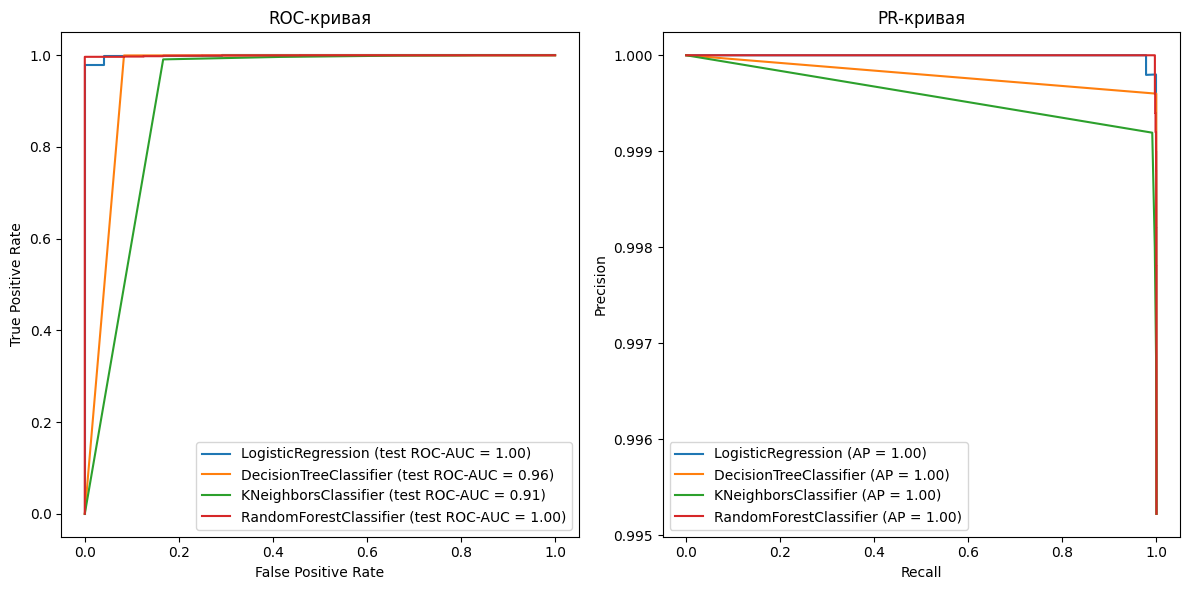

In [280]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score

results = {}

for model_name, model in models.items():
    y_pred_train = model.predict(X_train) # предсказания
    y_pred_test = model.predict(X_test)

    y_pred_train_prob = model.predict_proba(X_train)[:, 1] # вероятности для ROC, PR кривых (вероятности для класса 1 - положительный класс)
    y_pred_test_prob = model.predict_proba(X_test)[:, 1]

    train_accuracy = accuracy_score(y_train, y_pred_train) # точность
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_roc_auc = roc_auc_score(y_train, y_pred_train_prob) # площадь под ROC-кривой, измеряет качество классификации
    test_roc_auc = roc_auc_score(y_test, y_pred_test_prob)

    train_f1 = f1_score(y_train, y_pred_train) # гармоническое среднее точности и полноты
    test_f1 = f1_score(y_test, y_pred_test)

    train_precision, train_recall, _ = precision_recall_curve(y_train, y_pred_train_prob)
    test_precision, test_recall, _ = precision_recall_curve(y_test, y_pred_test_prob)
    # третье значение - пороги, на которых вычисляются значения точности и полноты

    results[model_name] = {
        "train accuracy": train_accuracy,
        "test accuracy": test_accuracy,
        "train ROC-AUC": train_roc_auc,
        "test ROC-AUC": test_roc_auc,
        "train F1-score": train_f1,
        "test F1-score": test_f1,
        "train precision-recall": (train_precision, train_recall),
        "test precision-recall": (test_precision, test_recall),
        "train ROC probabilities": y_pred_train_prob,
        "test ROC probabilities": y_pred_test_prob
    }

    print(f"\n{model_name}\ntrain accuracy: {train_accuracy:.4f}, test accuracy: {test_accuracy:.4f}")
    print(f"train ROC-AUC: {train_roc_auc:.4f}, test ROC-AUC: {test_roc_auc:.4f}")
    print(f"train F1-score: {train_f1:.4f}, test F1-score: {test_f1:.4f}")

plt.figure(figsize=(12, 6))

# ROC-кривая
plt.subplot(1, 2, 1)
for model_name in models.keys():
    fpr_train, tpr_train, _ = roc_curve(y_train, results[model_name]["train ROC probabilities"])
    fpr_test, tpr_test, _ = roc_curve(y_test, results[model_name]["test ROC probabilities"])
    plt.plot(fpr_test, tpr_test, label=f'{model_name} (test ROC-AUC = {results[model_name]["test ROC-AUC"]:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')

# PR-кривая
plt.subplot(1, 2, 2)
for model_name in models.keys():
    test_precision, test_recall = results[model_name]["test precision-recall"]
    plt.plot(test_recall, test_precision, label=f'{model_name} (AP = {average_precision_score(y_test, results[model_name]["test ROC probabilities"]):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


# Вопросы

*6. Сравните метрики относительно train/test, так и* *относительно разных моделей. Ответьте на следующие вопросы:*

*A. Какая модель справилась лучше с поставленной задачей?*

*B. Имеет ли место переобучение?*

*C. Имеет ли место недообучение?*

*D. Как можно улучшить метрики моделей?*

A. Лучше всего справляется логистическая регрессия. У нее высокие метрики на обучающем, так и на тестовом наборе.

Случайный лес и дерево решений показывают отличные результаты на обучающем наборе, но на тесте наблюдается небольшое снижение метрик.

B. Переобучение имеет место в случае дерева решений и случайного леса.

C. Недообучение не наблюдается. Все модели показывают хорошие результаты на тестовых данных.

D. Для случайного леса и дерева решений можно оптимизировать гиперпараметры (уменьшение глубины или увеличение количества деревьев).

In [281]:
# import pandas as pd
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.compose import ColumnTransformer

# df = pd.read_csv('Application_Data.csv', sep=',')

# X = df.drop(columns=['Status', 'Applicant_ID'])
# y = df['Status']  # целевая переменная

# ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# X_res, y_res = ros.fit_resample(X, y) # oversampling (добавляем экземпляров редкого класса)

# df_resampled = pd.DataFrame(X_res, columns=X.columns) # датафрейм с пересемплированными данными
# df_resampled['Status'] = y_res

# X = df_resampled.drop('Status', axis=1)  # признаки
# y = df_resampled['Status']  # целевая переменная

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# numerical_features = X.select_dtypes(include=['int64', 'float64']).columns # числовые признаки
# categorical_features = X.select_dtypes(include=['object']).columns # категориальные признаки

# numerical_transformer = StandardScaler()

# categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

# # модель логистической регрессии
# model = LogisticRegression(max_iter=1000, penalty='l2', C=0.0000001) # l2 регуляризация
# model.fit(X_train_transformed, y_train)

# y_pred_prob = model.predict_proba(X_test_transformed)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC-кривая')
# plt.legend(loc='lower right')
# plt.show()

# print(f'AUC: {roc_auc:.2f}')